In [1]:
import pmdarima
import pytz
import pandas as pd
import sm as sm
from pandas import DataFrame

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df = pd.read_csv('../shiba_v1.csv', parse_dates=['Date'], date_parser=dateparse)
df.set_index(["Date"], drop=False, inplace=True)
df.head()

C:\Users\Predrag\AppData\Local\Temp\ipykernel_6444\4087893732.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')


,Date,Open,High,Low,Close,Adj Close,Volume,reddit_average_posts_48h,reddit_average_comments_48h,reddit_subscribers,reddit_accounts_active_48h,shiba inu coin_unscaled,shiba inu coin_monthly,scale,shiba inu coin
Date,,,,,,,,,,,,,,,
2020-08-01,2020-08-01,0.0,0.0,0.0,0.0,0.0,1604789,0.0,0.0,0.000000,0.000000,0,0.0,0.0,0.0
2020-08-02,2020-08-02,0.0,0.0,0.0,0.0,0.0,193098,0.0,0.0,13.559829,0.217949,0,0.0,0.0,0.0
2020-08-03,2020-08-03,0.0,0.0,0.0,0.0,0.0,129225,0.0,0.0,27.119658,0.435897,0,0.0,0.0,0.0
2020-08-04,2020-08-04,0.0,0.0,0.0,0.0,0.0,19717,0.0,0.0,40.679487,0.653846,0,0.0,0.0,0.0
2020-08-05,2020-08-05,0.0,0.0,0.0,0.0,0.0,26869,0.0,0.0,54.239316,0.871795,0,0.0,0.0,0.0


In [2]:
print(pd.date_range(
  start="2020-08-01", end="2022-02-04").difference(df.index))

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [3]:
from python_scripts.time_series_utilities import check_stationarity, plot_pacf_acf

check_stationarity(df, 'Close')

ADF Statistic: -1.3714266193243194
p-value: 0.5958953369782671
Critial Values:
   1%, -3.442517884424376
Critial Values:
   5%, -2.8669071815780116
Critial Values:
   10%, -2.5696285219478736

KPSS Statistic: 2.206771
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


c:\users\predrag\desktop\siap\projectsiap2021\venv\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


<AxesSubplot:xlabel='Date'>

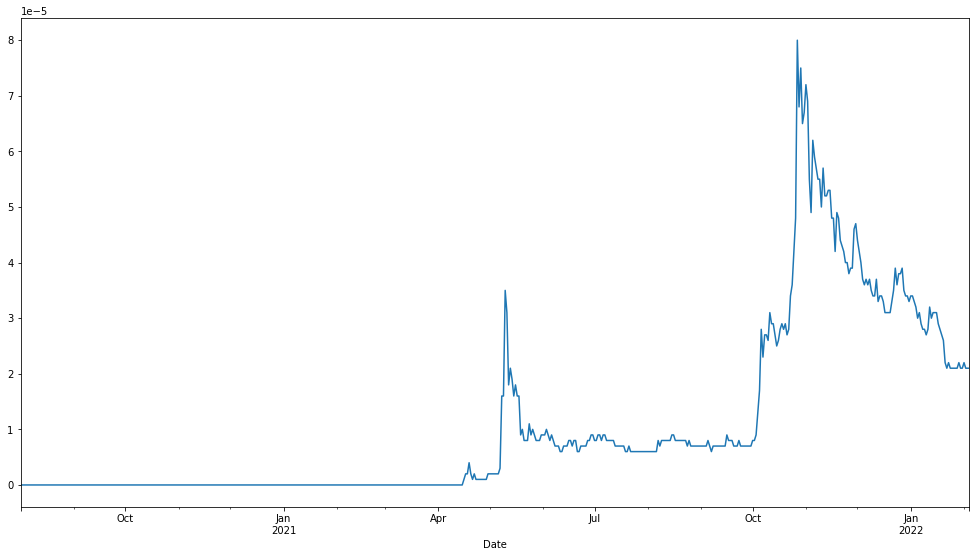

In [4]:

df['Close'].plot(figsize=(17, 9))

<AxesSubplot:xlabel='Date'>

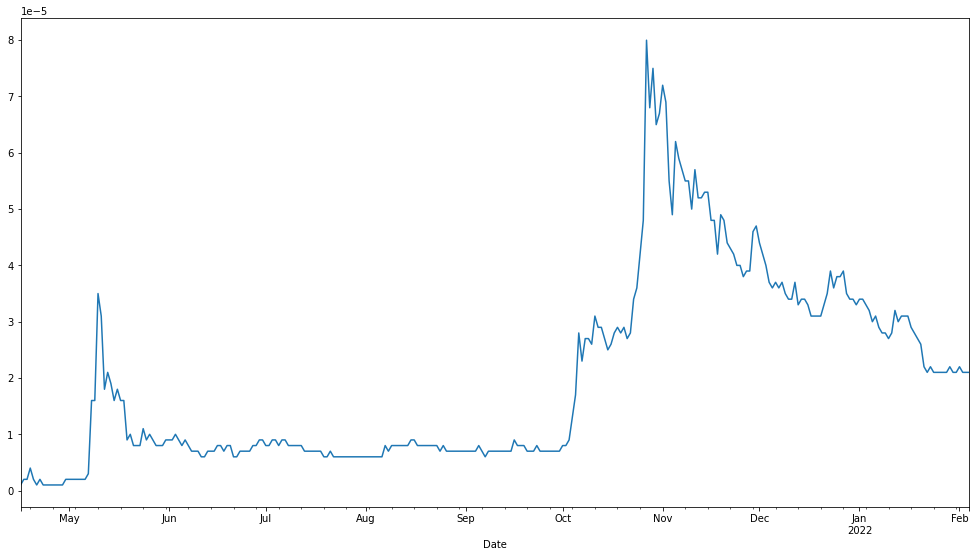

In [4]:
df.drop(df[df.Close == 0].index, inplace=True)
df['Close'].plot(figsize=(17, 9))

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,reddit_average_posts_48h,reddit_average_comments_48h,reddit_subscribers,reddit_accounts_active_48h,shiba inu coin_unscaled,shiba inu coin_monthly,scale,shiba inu coin
Date,,,,,,,,,,,,,,,
2021-04-16,2021-04-16,0.000000,0.000001,0.000000,0.000001,0.000001,161689870,9.300,114.300,4633.0,259.636364,36,1.0,0.01,0.36
2021-04-17,2021-04-17,0.000001,0.000003,0.000001,0.000002,0.000002,460833712,12.545,173.364,6120.0,579.333333,100,1.0,0.01,1.00
2021-04-18,2021-04-18,0.000002,0.000002,0.000001,0.000002,0.000002,142743623,11.182,186.727,7029.0,616.083333,41,3.0,0.03,1.23
2021-04-19,2021-04-19,0.000002,0.000004,0.000002,0.000004,0.000004,424418998,10.417,196.917,8434.0,590.615385,89,3.0,0.03,2.67
2021-04-20,2021-04-20,0.000004,0.000004,0.000002,0.000002,0.000002,526088540,11.667,234.917,10020.0,740.461538,85,3.0,0.03,2.55


<AxesSubplot:xlabel='Date'>

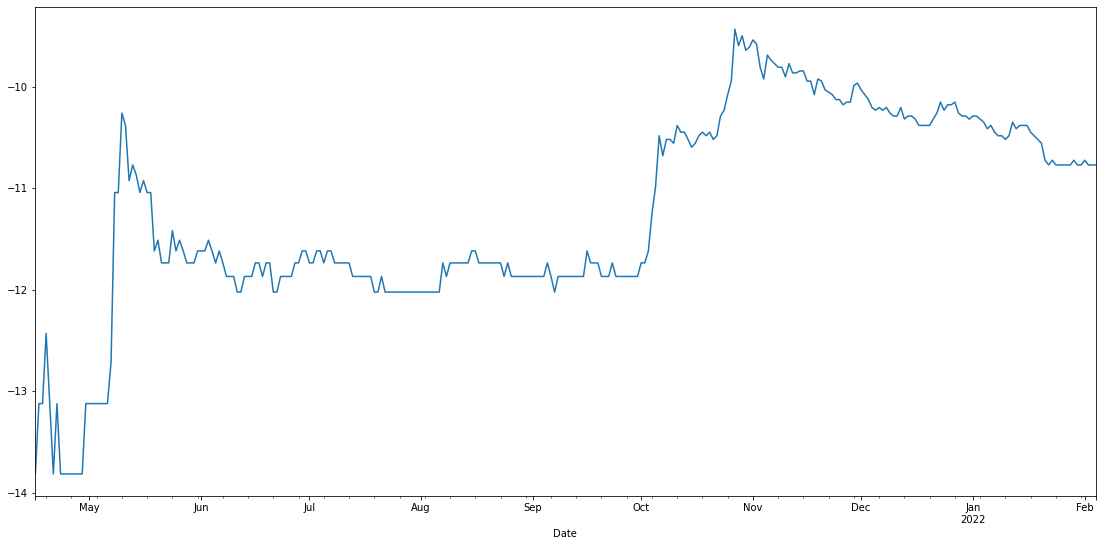

In [7]:
import numpy as np

df['transformed_Close'] = np.log(df['Close'])
df['transformed_Close'].plot(figsize=(19, 9))

In [8]:
check_stationarity(df, 'transformed_Close')

ADF Statistic: -2.552263538839828
p-value: 0.10327014256437639
Critial Values:
   1%, -3.4540935579190495
Critial Values:
   5%, -2.8719934111688965
Critial Values:
   10%, -2.5723401594120388

KPSS Statistic: 1.873024
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


c:\users\predrag\desktop\siap\projectsiap2021\venv\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


<AxesSubplot:xlabel='Date'>

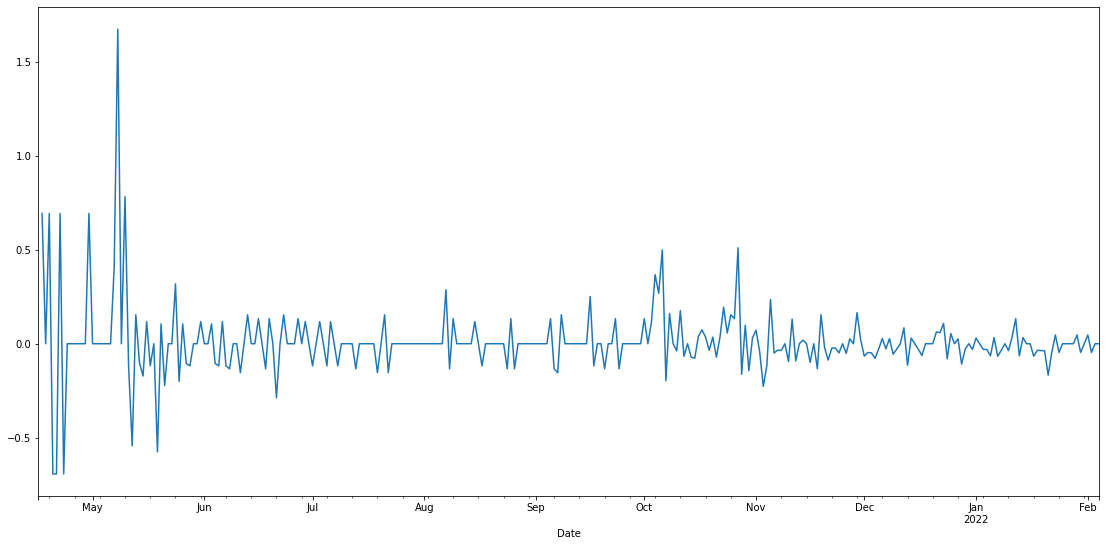

In [9]:
df['transformed_Close'] = df['transformed_Close'].diff()
df.dropna()
df['transformed_Close'].plot(figsize=(19, 9))

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,reddit_average_posts_48h,reddit_average_comments_48h,reddit_subscribers,reddit_accounts_active_48h,shiba inu coin_unscaled,shiba inu coin_monthly,scale,shiba inu coin,transformed_Close
Date,,,,,,,,,,,,,,,,
2021-04-16,2021-04-16,0.000000,0.000001,0.000000,0.000001,0.000001,161689870,9.300,114.300,4633.0,259.636364,36,1.0,0.01,0.36,NaN
2021-04-17,2021-04-17,0.000001,0.000003,0.000001,0.000002,0.000002,460833712,12.545,173.364,6120.0,579.333333,100,1.0,0.01,1.00,0.693147
2021-04-18,2021-04-18,0.000002,0.000002,0.000001,0.000002,0.000002,142743623,11.182,186.727,7029.0,616.083333,41,3.0,0.03,1.23,0.000000
2021-04-19,2021-04-19,0.000002,0.000004,0.000002,0.000004,0.000004,424418998,10.417,196.917,8434.0,590.615385,89,3.0,0.03,2.67,0.693147
2021-04-20,2021-04-20,0.000004,0.000004,0.000002,0.000002,0.000002,526088540,11.667,234.917,10020.0,740.461538,85,3.0,0.03,2.55,-0.693147


In [11]:
df = df.dropna()

In [12]:
check_stationarity(df, 'transformed_Close')

ADF Statistic: -5.303609982000415
p-value: 5.382155857231335e-06
Critial Values:
   1%, -3.4541800885158525
Critial Values:
   5%, -2.872031361137725
Critial Values:
   10%, -2.5723603999791473

KPSS Statistic: 0.146695
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


c:\users\predrag\desktop\siap\projectsiap2021\venv\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


c:\users\predrag\desktop\siap\projectsiap2021\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


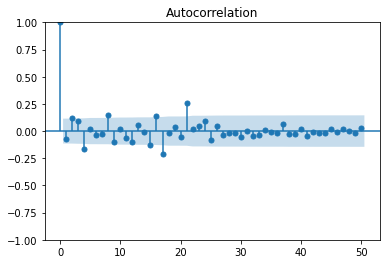

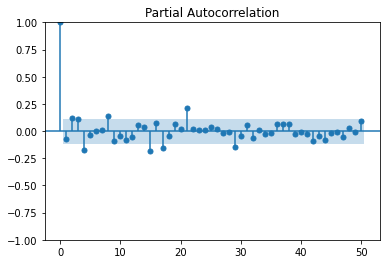

In [13]:
plot_pacf_acf(df, 'transformed_Close')

<AxesSubplot:xlabel='Date'>

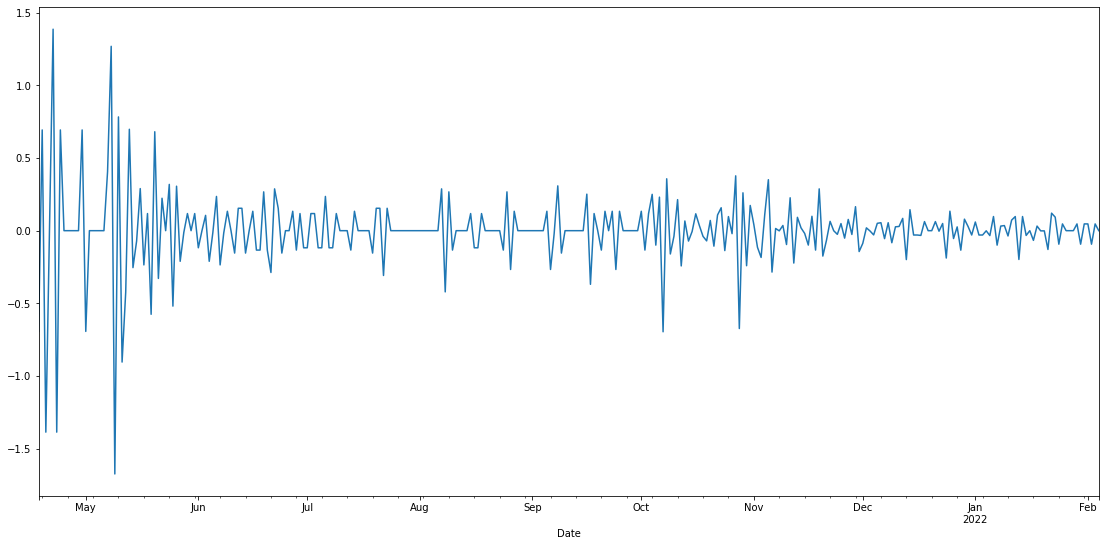

In [14]:
df['transformed_Close'] = df['transformed_Close'].diff()
df = df.dropna()
df['transformed_Close'].plot(figsize=(19, 9))

In [15]:
check_stationarity(df, 'transformed_Close')

ADF Statistic: -5.850669487974973
p-value: 3.5956621830322274e-07
Critial Values:
   1%, -3.4541800885158525
Critial Values:
   5%, -2.872031361137725
Critial Values:
   10%, -2.5723603999791473

KPSS Statistic: 0.029523
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


c:\users\predrag\desktop\siap\projectsiap2021\venv\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


c:\users\predrag\desktop\siap\projectsiap2021\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


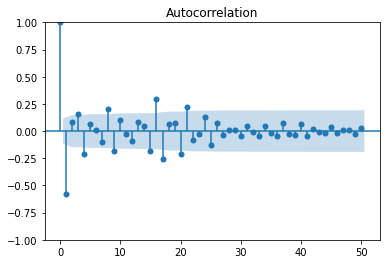

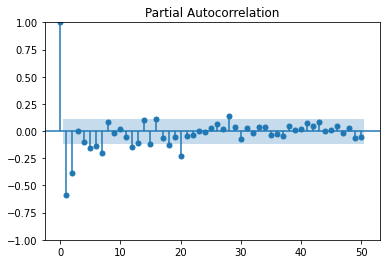

In [16]:
plot_pacf_acf(df, 'transformed_Close')

In [17]:
arima_model = pmdarima.auto_arima(np.log(df.Close),
                                  start_p = 3,
                                  start_q= 3,
                                  d=1,
                                  max_p=27,
                                  max_q=27,
                                  test='adf',
                                  seasonal=False,
                                  trace=True,
                                  error_action='ignore',
                                  stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-169.515, Time=5.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-159.060, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-158.877, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-158.584, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-160.495, Time=0.09 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-170.702, Time=1.95 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-169.984, Time=1.54 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-171.983, Time=1.67 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-163.189, Time=0.92 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-158.902, Time=1.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-174.546, Time=3.00 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-167.386, Time=2.33 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-173.393, Time=4.58 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-170.223, Time=3.52 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept

In [18]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(arima_model.resid(), lags=[50], return_df=True)

,lb_stat,lb_pvalue
50,12.050975,1.0


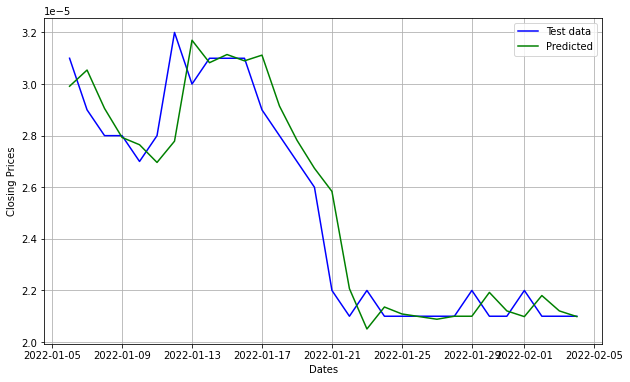

Test MAPE: 3.596


([2.991576749927017e-05,
  3.054335734244348e-05,
  2.9054651927432756e-05,
  2.793033974649717e-05,
  2.7648009380753895e-05,
  2.6962059144940644e-05,
  2.7785563530200964e-05,
  3.16985149690439e-05,
  3.0828123431516415e-05,
  3.114448828186575e-05,
  3.089982070215561e-05,
  3.112084190074977e-05,
  2.9147784151422466e-05,
  2.782329605083552e-05,
  2.673456438864166e-05,
  2.5838717927037554e-05,
  2.2067900179462164e-05,
  2.050608839962357e-05,
  2.1357634206473788e-05,
  2.1088597235843166e-05,
  2.0984698548161208e-05,
  2.0883718324625947e-05,
  2.1000000000000002e-05,
  2.1000000000000002e-05,
  2.192364903782932e-05,
  2.1206135688905454e-05,
  2.0984720861060288e-05,
  2.1801787038374112e-05,
  2.1206099877549885e-05,
  2.0985386711808307e-05],
 3.5963200449657693,
 <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x271017832e0>)

In [5]:
from python_scripts.time_series_utilities import test_arima_one_step
from python_scripts.sarima_helper import train_test_split_continual

train,test = train_test_split_continual(df, 0.1)
test_arima_one_step(train, test, 3,1,0)

In [ ]:
from python_scripts.time_series_utilities import grid_search_hyperparams

p_s = range(0,10)
q_s = range(0,10)
d_s = [1]

grid_search_hyperparams(p_s, q_s, d_s, train, test)

[<python_scripts.time_series_utilities.ArimaModelStats object at 0x000001DCD2E8F700>, <python_scripts.time_series_utilities.ArimaModelStats object at 0x000001DCD7300D30>, <python_scripts.time_series_utilities.ArimaModelStats object at 0x000001DCD7300E80>, <python_scripts.time_series_utilities.ArimaModelStats object at 0x000001DCD7300FD0>, <python_scripts.time_series_utilities.ArimaModelStats object at 0x000001DCD7301120>, <python_scripts.time_series_utilities.ArimaModelStats object at 0x000001DCD7301270>, <python_scripts.time_series_utilities.ArimaModelStats object at 0x000001DCD73013C0>, <python_scripts.time_series_utilities.ArimaModelStats object at 0x000001DCD7301510>, <python_scripts.time_series_utilities.ArimaModelStats object at 0x000001DCD7301660>, <python_scripts.time_series_utilities.ArimaModelStats object at 0x000001DCD73017B0>, <python_scripts.time_series_utilities.ArimaModelStats object at 0x000001DCD7301900>, <python_scripts.time_series_utilities.ArimaModelStats object at 

In [ ]:
test_arima_one_step(train, test, 1,1,1)